In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('jowar_datetime.csv.csv')

In [4]:
df.head()

,year,jowar_production
0,1966-01-01,743.3
1,1967-01-01,695.4
2,1968-01-01,737.0
3,1969-01-01,840.9
4,1970-01-01,637.0


In [5]:
df.dtypes

year                 object
jowar_production    float64
dtype: object

In [6]:
df['year'] = pd.to_datetime(df['year'])

In [7]:
df.dtypes

year                datetime64[ns]
jowar_production           float64
dtype: object

In [8]:
df.set_index('year',inplace=True)

In [9]:
df.head()


,jowar_production
year,
1966-01-01,743.3
1967-01-01,695.4
1968-01-01,737.0
1969-01-01,840.9
1970-01-01,637.0


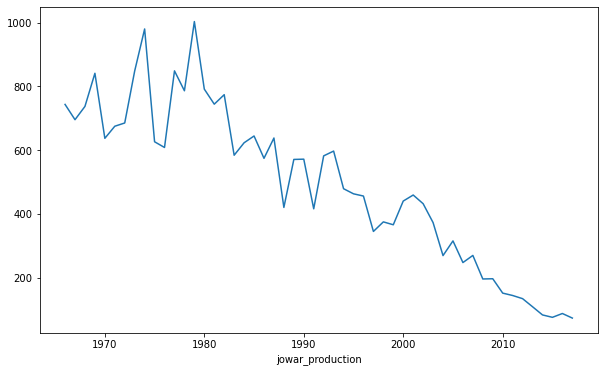

In [10]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
plt.xlabel('year')
plt.xlabel('jowar_production')
plt.plot(df)

In [11]:
rolmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std()
print(rolmean,rolstd)

            jowar_production
year                        
1966-01-01               NaN
1967-01-01               NaN
1968-01-01               NaN
1969-01-01               NaN
1970-01-01               NaN
1971-01-01               NaN
1972-01-01               NaN
1973-01-01               NaN
1974-01-01               NaN
1975-01-01               NaN
1976-01-01               NaN
1977-01-01        743.733333
1978-01-01        747.300000
1979-01-01        772.941667
1980-01-01        777.466667
1981-01-01        769.400000
1982-01-01        780.800000
1983-01-01        773.225000
1984-01-01        768.050000
1985-01-01        751.050000
1986-01-01        717.250000
1987-01-01        718.233333
1988-01-01        702.566667
1989-01-01        679.423333
1990-01-01        661.551667
1991-01-01        612.625833
1992-01-01        595.179167
1993-01-01        582.920833
1994-01-01        558.354167
1995-01-01        548.270833
1996-01-01        534.354167
1997-01-01        509.412500
1998-01-01    

Text(0.5, 1.0, 'rolling mean and std')

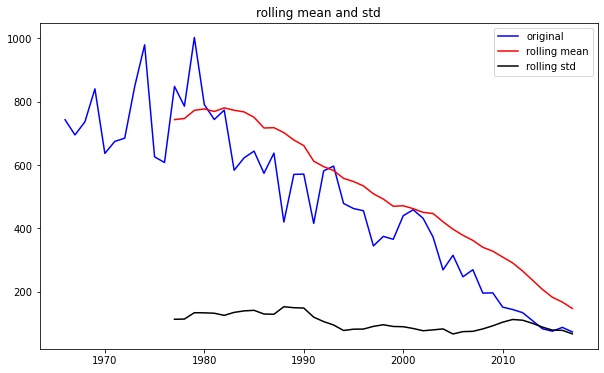

In [12]:
orig = plt.plot(df,color="blue",label='original')
mean = plt.plot(rolmean,color='red',label='rolling mean')
std = plt.plot(rolstd,color='black',label='rolling std')
plt.legend(loc='best')
plt.title('rolling mean and std')

In [13]:
from statsmodels.tsa.stattools import adfuller
print('dickey fuller test:')
dftest = adfuller(df['jowar_production'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Stistic','p value','#Lags used','Number of Observations used'])
for key, value in dftest[4].items():
    dfoutput['Criticl Value (%s)'%key] = value
    
print(dfoutput)

dickey fuller test:
Test Stistic                    0.822006
p value                         0.991983
#Lags used                      4.000000
Number of Observations used    47.000000
Criticl Value (1%)             -3.577848
Criticl Value (5%)             -2.925338
Criticl Value (10%)            -2.600774
dtype: float64


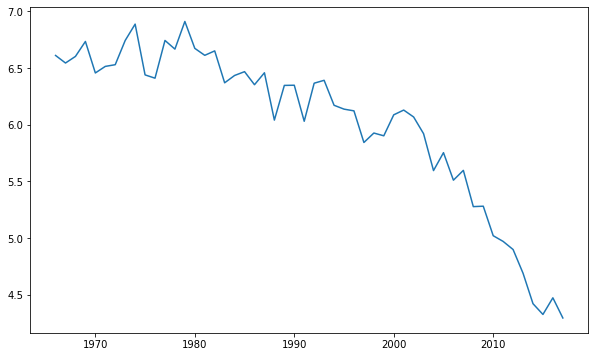

In [14]:
df_logscale = np.log(df)
plt.plot(df_logscale)

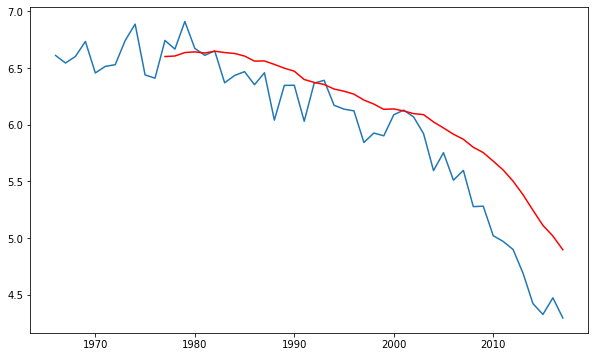

In [15]:
movingaverage = df_logscale.rolling(window=12).mean()
movingstd = df_logscale.rolling(window=12).std()
plt.plot(df_logscale)
plt.plot(movingaverage,color='red')

In [16]:
dflogscale_minusmivingaverage = df_logscale - movingaverage
dflogscale_minusmivingaverage.head(12)

dflogscale_minusmivingaverage.dropna(inplace=True)
dflogscale_minusmivingaverage.head(10)

,jowar_production
year,
1977-01-01,0.141967
1978-01-01,0.060915
1979-01-01,0.274152
1980-01-01,0.031054
1981-01-01,-0.020256
1982-01-01,0.002670
1983-01-01,-0.266687
1984-01-01,-0.194124
1985-01-01,-0.137583


In [17]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingaverage = timeseries.rolling(window=12).mean()
    movingstd = timeseries.rolling(window=12).std()
    orig = plt.plot(timeseries,color='blue',label='original')
    mean = plt.plot(movingaverage,color='red',label='rolling mean')
    std = plt.plot(movingstd,color='black',label='rolling std')
    plt.legend(loc='best')
    plt.title('rolling mean & std')
    
    print('results of dickey fuller test:')
    dftest  =adfuller(timeseries['jowar_production'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p value','#Lags Used','Number of Observatios Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput)

results of dickey fuller test:
Test Statistic                -1.450231
p value                        0.557972
#Lags Used                     1.000000
Number of Observatios Used    39.000000
Critical value (1%)           -3.610400
Critical value (5%)           -2.939109
Critical value (10%)          -2.608063
dtype: float64


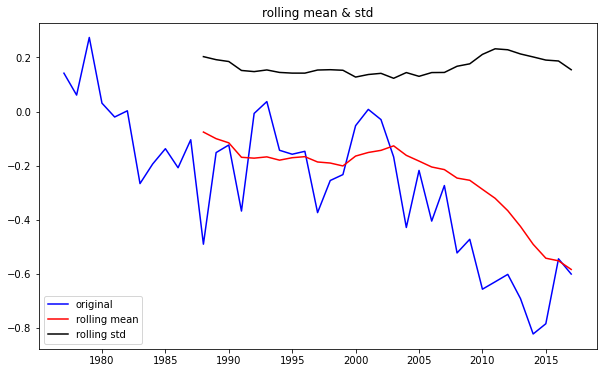

In [18]:
test_stationarity(dflogscale_minusmivingaverage)

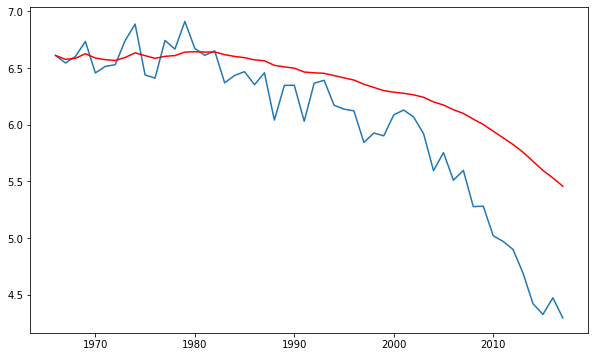

In [19]:
exponentialweighteddecayaverage = df_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(df_logscale)
plt.plot(exponentialweighteddecayaverage,color='red')

results of dickey fuller test:
Test Statistic                -0.246981
p value                        0.932685
#Lags Used                     1.000000
Number of Observatios Used    50.000000
Critical value (1%)           -3.568486
Critical value (5%)           -2.921360
Critical value (10%)          -2.598662
dtype: float64


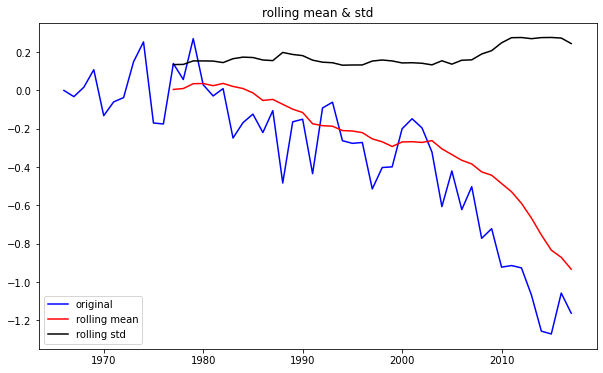

In [20]:
datalogscaleminusmovingexponentialdecayaverage = df_logscale - exponentialweighteddecayaverage
test_stationarity(datalogscaleminusmovingexponentialdecayaverage)

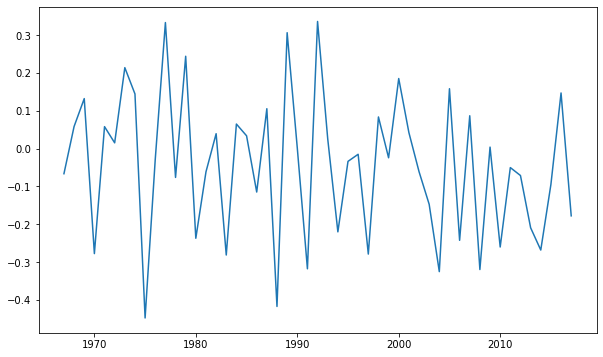

In [21]:
dflogdiffshifting = df_logscale - df_logscale.shift()
plt.plot(dflogdiffshifting)

results of dickey fuller test:
Test Statistic               -9.701469e+00
p value                       1.069378e-16
#Lags Used                    0.000000e+00
Number of Observatios Used    5.000000e+01
Critical value (1%)          -3.568486e+00
Critical value (5%)          -2.921360e+00
Critical value (10%)         -2.598662e+00
dtype: float64


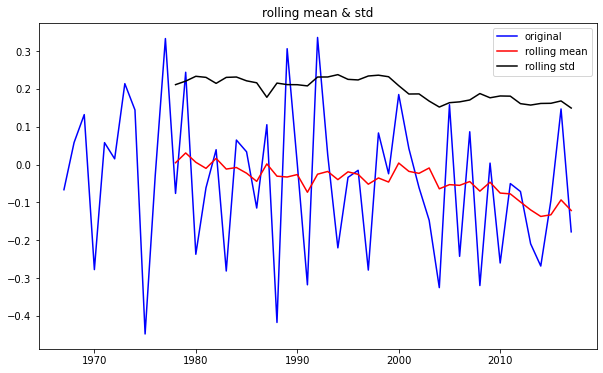

In [22]:
dflogdiffshifting.dropna(inplace=True)
test_stationarity(dflogdiffshifting)

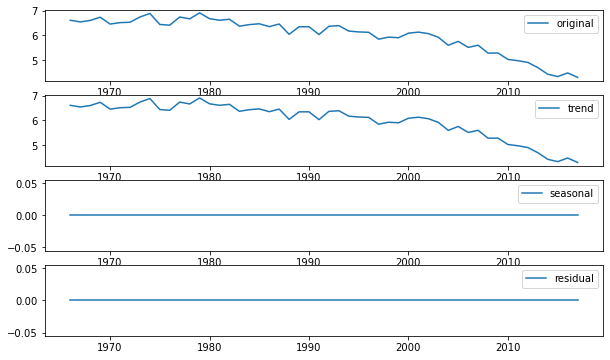

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_logscale,label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


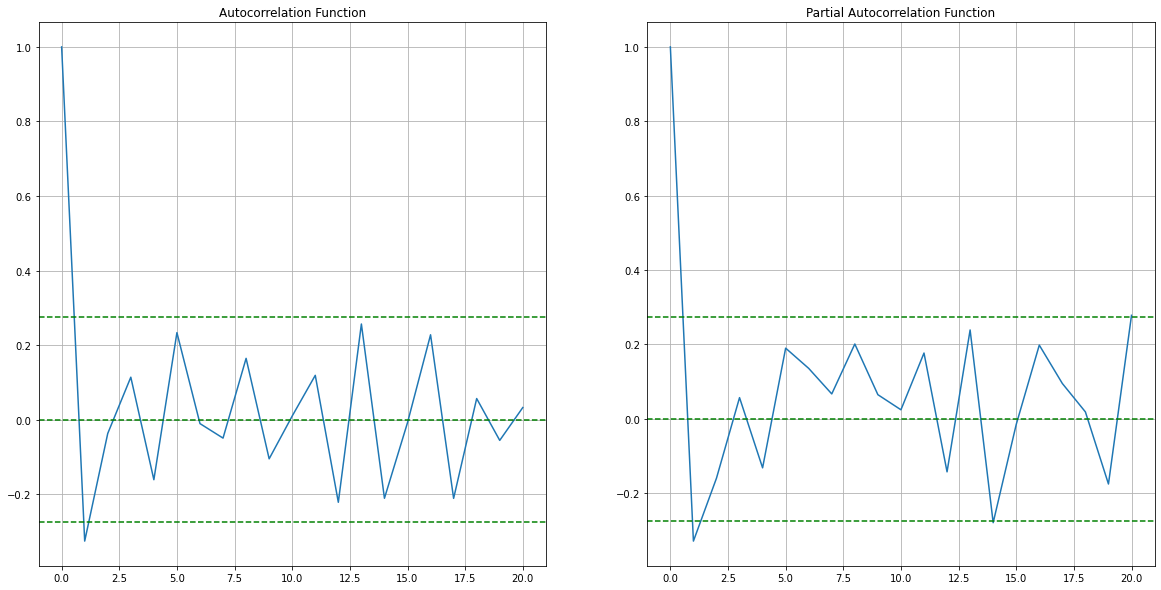

In [24]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(dflogdiffshifting, nlags=20)
lag_pacf=pacf(dflogdiffshifting, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.title('Autocorrelation Function')
plt.grid()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')
plt.grid()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN 

plotting AR MODEL


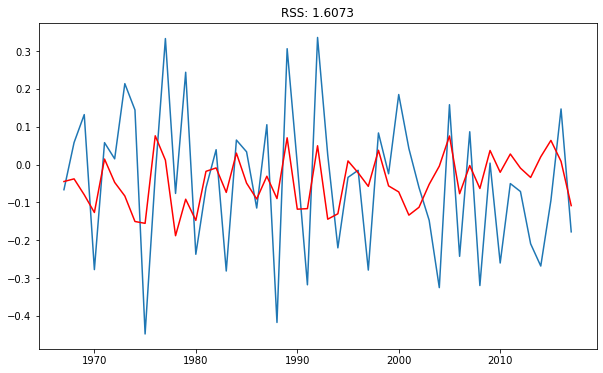

In [25]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_logscale,order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(dflogdiffshifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-dflogdiffshifting['jowar_production'])**2))
print('plotting AR MODEL')

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


plotting AR MODEL


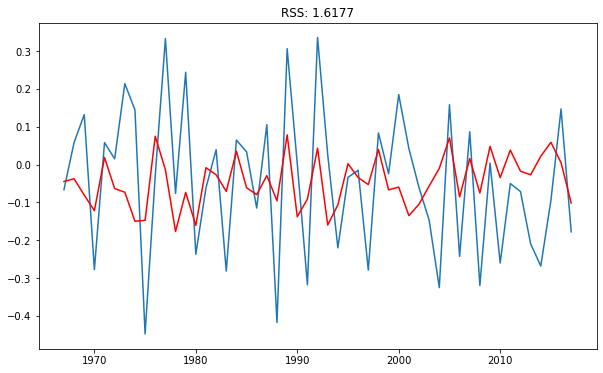

In [26]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_logscale,order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(dflogdiffshifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues-dflogdiffshifting['jowar_production'])**2))
print('plotting AR MODEL')

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0

plotting AR MODEL


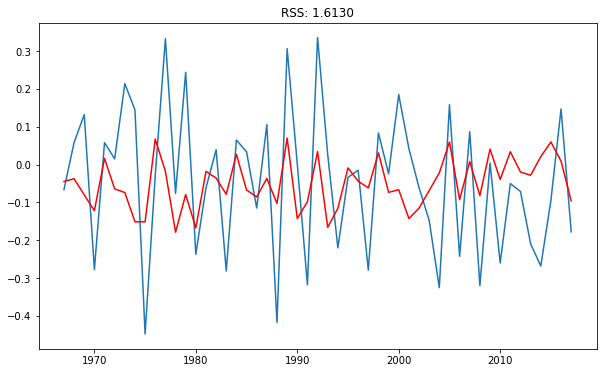

In [27]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_logscale,order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(dflogdiffshifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues-dflogdiffshifting['jowar_production'])**2))
print('plotting AR MODEL')

In [28]:
predictions_arima_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
predictions_arima_diff.head()

year
1967-01-01   -0.044829
1968-01-01   -0.037602
1969-01-01   -0.080289
1970-01-01   -0.121916
1971-01-01    0.015977
dtype: float64

In [29]:
predictions_arima_diff_cumsum = predictions_arima_diff.cumsum()
predictions_arima_diff_cumsum.head()

year
1967-01-01   -0.044829
1968-01-01   -0.082431
1969-01-01   -0.162721
1970-01-01   -0.284637
1971-01-01   -0.268659
dtype: float64

In [30]:
predictions_arima_log = pd.Series(df_logscale.iloc[:, 0],index=df_logscale.index)
predictions_arima_log = predictions_arima_log.add(predictions_arima_diff_cumsum,fill_value = 0)
predictions_arima_log.head()

year
1966-01-01    6.611100
1967-01-01    6.499658
1968-01-01    6.520156
1969-01-01    6.571752
1970-01-01    6.172133
dtype: float64

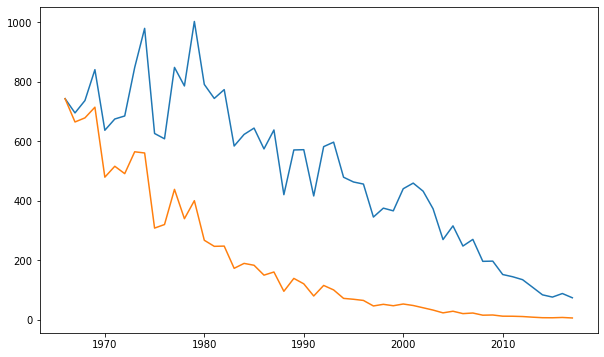

In [31]:
predictions_arima = np.exp(predictions_arima_log)
plt.plot(df)
plt.plot(predictions_arima)

In [32]:
df_logscale.head(5)

,jowar_production
year,
1966-01-01,6.611100
1967-01-01,6.544487
1968-01-01,6.602588
1969-01-01,6.734473
1970-01-01,6.456770


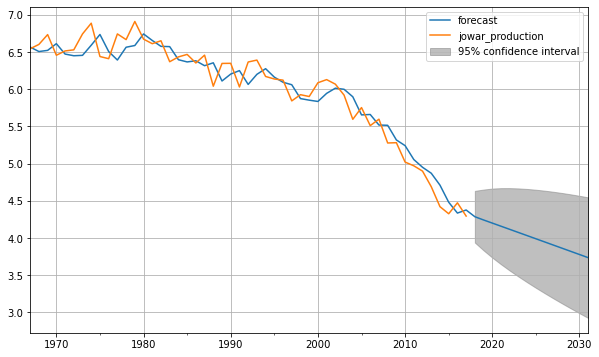

In [33]:
results_ARIMA.plot_predict(1,65)
plt.grid()

In [34]:
x = results_ARIMA.forecast(steps=120)

In [35]:
def iterative_ARIMA_fit(series):

    ARIMA_fit_results = {}
    for AR in ARrange:
        for MA in MArange :
            for Diff in Diffrange:
                model = ARIMA(series, order = (AR,Diff,MA))
                fit_is_available = False
                results_ARIMA = None
                try:
                    results_ARIMA = model.fit(disp = -1, method = 'css')
                    fit_is_available = True
                except:
                    continue
                if fit_is_available:
                    safe_RSS = get_safe_RSS(series, results_ARIMA.fittedvalues)
                    ARIMA_fit_results['%d-%d-%d' % (AR,Diff,MA)]=[safe_RSS,results_ARIMA]

    return ARIMA_fit_results

In [36]:
def get_best_ARIMA_model_fit(series):

    if t.isstationary(series)[0]:
        ARIMA_fit_results = iterative_ARIMA_fit(series)
        best_ARIMA = min(ARIMA_fit_results, key = ARIMA_fit_results.get)
        
        return ARIMA_fit_results[best_ARIMA]

In [37]:
def get_safe_RSS(series, fitted_values):
    fitted_values_copy = fitted_values  # original fit is left untouched
    missing_index = list(set(series.index).difference(set(fitted_values_copy.index)))
    if missing_index:
        nan_series = pd.Series(index = pd.to_datetime(missing_index))
        fitted_values_copy = fitted_values_copy.append(nan_series)
        fitted_values_copy.sort_index(inplace = True)
        fitted_values_copy.fillna(method = 'bfill', inplace = True)  # fill holes
        fitted_values_copy.fillna(method = 'ffill', inplace = True)
    return sum((fitted_values_copy - series)**2)

In [38]:
df.size

52